In [4]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import pandas as pd




In [5]:
S0 = 100    
K = 105     
r = 0.04    
delta = 0   
sigma = 0.25  
T = 1       



In [6]:
# Black-Scholes
def black_scholes_put(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1)
    return put_price

bs_price = black_scholes_put(S0, K, r, T, sigma)

# Binomial Tree
def binomial_put(S, K, r, T, sigma, N, method="CRR"):
    dt = T / N 
    if method == "CRR":
        u = np.exp(sigma * np.sqrt(dt))
        d = 1 / u
    elif method == "RB":
        u = np.exp((r - delta - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt))
        d = np.exp((r - delta - 0.5 * sigma**2) * dt - sigma * np.sqrt(dt))
    else:
        raise ValueError("Error")

    p = (np.exp(r * dt) - d) / (u - d) 
    discount = np.exp(-r * dt)

    stock_prices = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(i + 1):
            stock_prices[j, i] = S * (u ** (i - j)) * (d ** j)

    option_values = np.zeros((N + 1, N + 1))
    for j in range(N + 1):
        option_values[j, N] = max(K - stock_prices[j, N], 0)

    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_values[j, i] = discount * (p * option_values[j, i + 1] + (1 - p) * option_values[j + 1, i + 1])

    return option_values[0, 0]



In [12]:

N_values = np.arange(50, 1050, 1)
errors_crr = []
errors_rb = []

for N in N_values:
    price_crr = binomial_put(S0, K, r, T, sigma, N, method="CRR")
    price_rb = binomial_put(S0, K, r, T, sigma, N, method="RB")

    errors_crr.append(abs(price_crr - bs_price))
    errors_rb.append(abs(price_rb - bs_price))
    #errors_crr.append(price_crr - bs_price)
    #errors_rb.append(price_rb - bs_price)






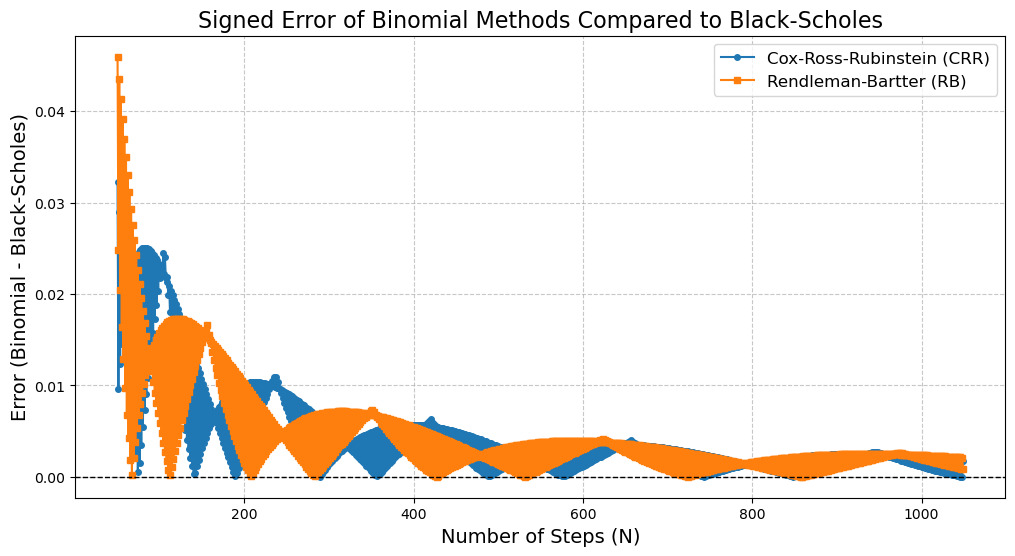

In [14]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(N_values, errors_crr, label="Cox-Ross-Rubinstein (CRR)", marker='o', linestyle='-', markersize=4)
plt.plot(N_values, errors_rb, label="Rendleman-Bartter (RB)", marker='s', linestyle='-', markersize=4)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Reference line for zero error
plt.xlabel("Number of Steps (N)", fontsize=14)
plt.ylabel("Error (Binomial - Black-Scholes)", fontsize=14)
plt.title("Signed Error of Binomial Methods Compared to Black-Scholes", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


1. Error decreases as N increases

   When N is small , the error is relatively high. But as N increases, the error gradually decreases, showing that the binomial methods are getting closer to the Black-Scholes price.





2. Both Methods Eventually Converge to the Black-Scholes Price




3. CRR vs. RB Method


   The CRR method (Cox-Ross-Rubinstein) has smaller errors overall and shows a smoother decline in error.

   The RB method (Rendleman-Bartter) has slightly larger errors in some ranges and a bit more fluctuation, but it still converges over time.
   
   This could be due to differences in their formulation. The CRR method’s upward and downward movements are symmetric, while RB is not, causing the RB method to have slightly larger approximation errors at certain step sizes.
